--- Day 8: Two-Factor Authentication ---

You come across a door implementing what you can only assume is an implementation of two-factor authentication after a long game of requirements telephone.

To get past the door, you first swipe a keycard (no problem; there was one on a nearby desk). Then, it displays a code on a little screen, and you type that code on a keypad. Then, presumably, the door unlocks.

Unfortunately, the screen has been smashed. After a few minutes, you've taken everything apart and figured out how it works. Now you just have to work out what the screen would have displayed.

The magnetic strip on the card you swiped encodes a series of instructions for the screen; these instructions are your puzzle input. The screen is 50 pixels wide and 6 pixels tall, all of which start off, and is capable of three somewhat peculiar operations:

    rect AxB turns on all of the pixels in a rectangle at the top-left of the screen which is A wide and B tall.
    rotate row y=A by B shifts all of the pixels in row A (0 is the top row) right by B pixels. Pixels that would fall off the right end appear at the left end of the row.
    rotate column x=A by B shifts all of the pixels in column A (0 is the left column) down by B pixels. Pixels that would fall off the bottom appear at the top of the column.

For example, here is a simple sequence on a smaller screen:

    rect 3x2 creates a small rectangle in the top-left corner:

    ###....
    ###....
    .......

    rotate column x=1 by 1 rotates the second column down by one pixel:

    #.#....
    ###....
    .#.....

    rotate row y=0 by 4 rotates the top row right by four pixels:

    ....#.#
    ###....
    .#.....

    rotate column x=1 by 1 again rotates the second column down by one pixel, causing the bottom pixel to wrap back to the top:

    .#..#.#
    #.#....
    .#.....

As you can see, this display technology is extremely powerful, and will soon dominate the tiny-code-displaying-screen market. That's what the advertisement on the back of the display tries to convince you, anyway.

There seems to be an intermediate check of the voltage used by the display: after you swipe your card, if the screen did work, how many pixels should be lit?


--- Part Two ---

You notice that the screen is only capable of displaying capital letters; in the font it uses, each letter is 5 pixels wide and 6 tall.

After you swipe your card, what code is the screen trying to display?


In [1]:
import matplotlib.pyplot as plt

In [2]:
filepath = "..\\data\\input_day_08.txt"
test1 = "..\\test\\test08_1.txt"
test2 = "..\\test\\test08_2.txt"

In [3]:
def read_input(filepath):
    with open(filepath, 'r') as f:
        lines = f.readlines()
    
    return lines

In [4]:
def convert_input(lines):
    split = []
    for line in lines:
        if "rect" in line:
            line = line.strip().replace("x", " ")
            command, y, x = line.split()
            split.append([command, int(x), int(y)])
        if "rotate" in line:
            line = line.strip()
            command, _, coord, _, n = line.split()
            split.append([command, coord, int(n)])
    return split

In [5]:
def get_axis_index(coord):
    
    axis, index = coord.split("=")
    return axis, int(index)

In [6]:
def turn_on(x, y, grid):
    
    for i in range(x):
        for j in range(y):
            grid[i][j] = 1
    return grid

In [7]:
def rotate(axis, index, n, grid):
    if axis == "x":
        col = [i[index] for i in grid]
        shifted_col = col[-n:] + col[:-n]
        
        for i, val in enumerate(shifted_col):
            grid[i][index] = val
    
    if axis == "y":
        row = grid[index]
        shifted_row = row[-n:] + row[:-n]
        grid[index] = shifted_row
        
    return grid

In [8]:
def day08a(filepath):
    
    # read the input
    instructions = read_input(filepath)
    instructions = convert_input(instructions)
    
    grid = [[0 for _ in range(50)] for _ in range(6)]
    
    for instruction in instructions:
        
        if "rect" in instruction:
            _, x, y = instruction 
            grid = turn_on(x, y, grid)
            
        if "rotate" in instruction:
            _,  coord, n = instruction
            axis, index = get_axis_index(coord)
            grid = rotate(axis, index, n, grid)
        
    #for row in grid:
    #    print(row)
    voltage = sum([sum(i) for i in grid])
    print(f"There should be {voltage} pixels lit.")
    return voltage, grid

In [9]:
def day08b(filepath):
    
    _, grid = day08a(filepath)
    
    plt.figure(figsize=(12,8))
    plt.imshow(grid)
    plt.show()

In [10]:
voltage, grid = day08a(filepath)

There should be 121 pixels lit.


There should be 121 pixels lit.


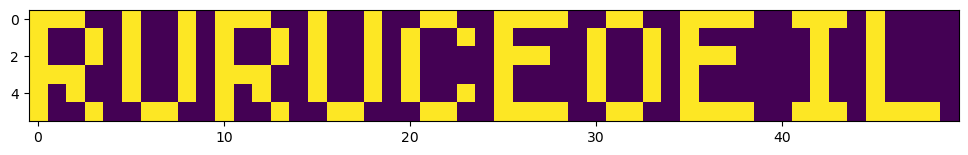

In [11]:
day08b(filepath)